In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

## Load and preprocess MNIST dataset

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 28, 28, 1).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) float32
(10000, 28, 28, 1) float32
(60000,) uint8
(10000,) uint8


## Visualize MNIST examples

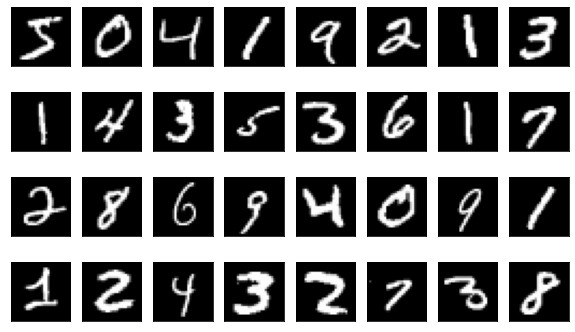

In [ ]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

## Create the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Prepare for training

In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

## Train the model

In [ ]:
NUM_EPOCHS = 4

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4400 - accuracy: 0.8737
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9679
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9816


## Evaluate the model

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9815


[0.05174822360277176, 0.9815000295639038]

## Example of inference

In [ ]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[1.9659142e-07 1.3975593e-08 6.0869766e-06 1.6998616e-05 9.0804688e-09
 4.1802750e-08 3.9653513e-13 9.9994981e-01 2.7929204e-07 2.6643451e-05], shape=(10,), dtype=float32)


## Define function for inference and result visualization

In [ ]:
def test_digit(sample):
    
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

## Run inference on a random test exmaple

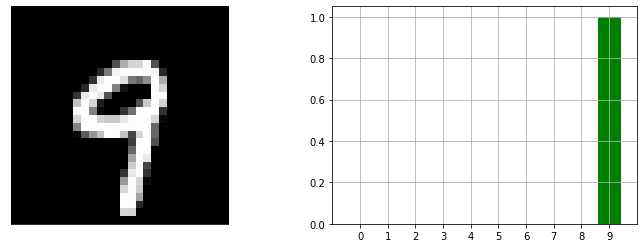

Predicted number: 9
True Answer: 9


In [ ]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

print('True Answer: {}'.format(test_y[idx]))

## Run inference on our example

In [ ]:
def load_and_prepare_image(fpath):
    import imageio
    from skimage.transform import resize
    img = imageio.imread(fpath, pilmode="RGB")
    img = img.astype(np.float32)/255
    img = resize(img, (28, 28), order=3, mode='reflect', anti_aliasing=True)
    img = (1. - img).astype(np.float32)
    img = np.mean(img, axis=2)
    img = np.reshape(img, (28, 28, 1))
    return img

if 1:
    !wget https://raw.githubusercontent.com/dkorobchenko-nv/dl-demo/master/mnist/digit.png

--2020-11-11 19:01:29--  https://raw.githubusercontent.com/dkorobchenko-nv/dl-demo/master/mnist/digit.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16356 (16K) [image/png]
Saving to: ‘digit.png’

digit.png           100%[===================>]  15.97K  --.-KB/s    in 0.007s  

2020-11-11 19:01:29 (2.38 MB/s) - ‘digit.png’ saved [16356/16356]



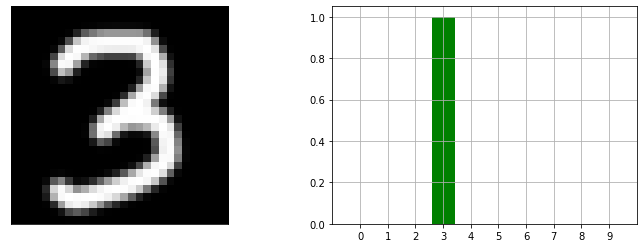

Predicted number: 3


In [ ]:
img = load_and_prepare_image('./digit.png')
test_digit(img)